# DATA DESCRIPTION

**Sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api.**<br>

It contains the following 6 fields:<br>

1. target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)<br>
2. ids: The id of the tweet ( 2087)<br>
3. date: the date of the tweet (Sat May 16 23:58:44 UTC 2009) <br>
4. flag: The query (lyx). If there is no query, then this value is NO_QUERY.<br>
5. user: the user that tweeted (robotickilldozr)<br>
6. text: the text of the tweet (Lyx is cool)<br>



In [496]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from tqdm import tqdm

In [497]:
tweets_df=pd.read_csv('data/training.1600000.processed.noemoticon.csv', encoding = 'latin', header=None)
tweets_df = tweets_df.sample(frac=1)
#Data including total available
print("Total Data")
print(len(tweets_df))
tweets_df = tweets_df[0:1600000]
print("Used Data")
print(len(tweets_df))
tweets_df = tweets_df.rename(columns={0: 'target', 1: 'id', 2: 'TimeStamp', 3: 'query', 4: 'username', 5: 'content'})
tweets_df.drop(['id','TimeStamp','query','username'], axis=1, inplace=True)

Total Data
1600000
Used Data
1600000


In [498]:
tweets_df

,target,content
241728,0,@erinherschleman and i aren't co-secretary for...
1114501,4,@shoshanabean are you really on the Dance Flic...
342136,0,@Gem_Illingworth I used to have the book - a p...
785274,0,where has the sun gone
595460,0,@vuanhtruong im kidding myself. vuuuu progress...
...,...,...
1056208,4,@amber_benson You should try to channel your i...
698157,0,my itouch just died going to watch the lion t...
665672,0,@ihl i miss you
1134079,4,Hubby's working in the back yard now. I'm pre...


In [499]:
tweets_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 241728 to 987352
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   target   1600000 non-null  int64 
 1   content  1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 36.6+ MB


array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

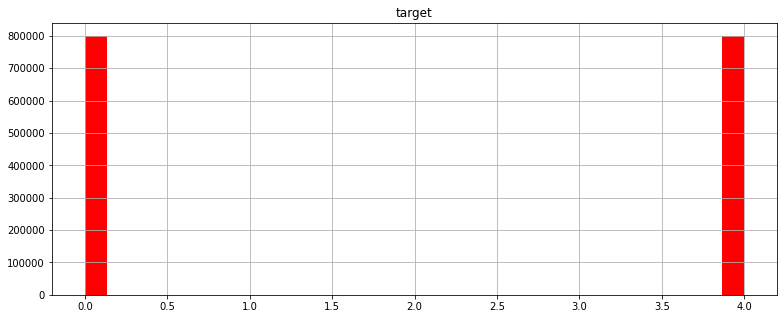

In [500]:
#Distribution Histogram
tweets_df.hist(bins=30,figsize=(13,5),color='r')

In [501]:
tweets_df['length']=tweets_df['content'].apply(len)
tweets_df

,target,content,length
241728,0,@erinherschleman and i aren't co-secretary for...,109
1114501,4,@shoshanabean are you really on the Dance Flic...,65
342136,0,@Gem_Illingworth I used to have the book - a p...,59
785274,0,where has the sun gone,23
595460,0,@vuanhtruong im kidding myself. vuuuu progress...,110
...,...,...,...
1056208,4,@amber_benson You should try to channel your i...,57
698157,0,my itouch just died going to watch the lion t...,71
665672,0,@ihl i miss you,16
1134079,4,Hubby's working in the back yard now. I'm pre...,90


<AxesSubplot:ylabel='Frequency'>

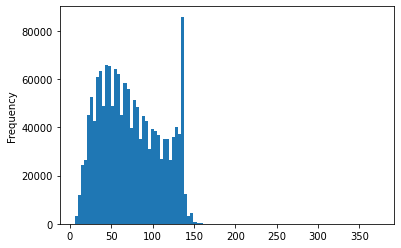

In [502]:
tweets_df['length'].plot(bins=100, kind='hist')

In [503]:
positive=tweets_df[tweets_df['target']==4]
negative=tweets_df[tweets_df['target']==0]

In [504]:
positive

,target,content,length
1114501,4,@shoshanabean are you really on the Dance Flic...,65
857118,4,add me on myspace people,25
844343,4,@NiftyKnits @marceline (askingfortrouble) will...,75
1128745,4,Time to go buy a new swimsuit. It's been like ...,110
1279285,4,@sahtaylor me neither! so excited yepp defini...,128
...,...,...,...
1304159,4,I'm tweeting too!!hehe tweet tweet,35
964592,4,@kittykatmeoww http://twitpic.com/5ceyq - Purr...,67
1056208,4,@amber_benson You should try to channel your i...,57
1134079,4,Hubby's working in the back yard now. I'm pre...,90


In [505]:
negative

,target,content,length
241728,0,@erinherschleman and i aren't co-secretary for...,109
342136,0,@Gem_Illingworth I used to have the book - a p...,59
785274,0,where has the sun gone,23
595460,0,@vuanhtruong im kidding myself. vuuuu progress...,110
318196,0,getting ready for class @ 8 a.m. ughh i'm tired,48
...,...,...,...
652305,0,@juventuz I wish I could have the white one,44
88719,0,My mom is all upset today because my brother i...,95
357229,0,In the dark......literally. Power's out.,42
698157,0,my itouch just died going to watch the lion t...,71


In [506]:
sentences=tweets_df['content'].tolist()
sentences

["@erinherschleman and i aren't co-secretary for junior holy name anymore.  we never did our job anyways. Haha.",
 '@shoshanabean are you really on the Dance Flick soundtrack?  haha',
 '@Gem_Illingworth I used to have the book - a painful read! ',
 'where has the sun gone ',
 "@vuanhtruong im kidding myself. vuuuu progress isn't good  imma jump from 13th floor and pray that i die fast.",
 'add me on myspace people ',
 '@NiftyKnits @marceline (askingfortrouble) will make you a Shopify for cake ',
 "Time to go buy a new swimsuit. It's been like two years and I'm tired of being made fun of for my granny suit ",
 "getting ready for class @ 8 a.m. ughh i'm tired ",
 '@sahtaylor me neither! so excited  yepp definitely  i love their live chats! wbu? do u have any ideas for questions to ask them?',
 '@freakinaris http://twitpic.com/6iotv - awwwwwww how cute =] hehe go dog work it work it model it up ',
 "Ugh, sick.  Can't get rid of it!",
 'summer is great so far i guess, nothing is..really pe

In [507]:
print("Total Data :",len(sentences))

print("Total Positive :",len(positive))

print("Total Negative :",len(negative))


Total Data : 1600000
Total Positive : 800000
Total Negative : 800000


**Cleaning Data**

Replacing handwritten emojis with their feeling associated. <br>
Convert to lowercase.<br>
Replace contractions.<br>
Replace abbrevations.<br>
Replace unicode emojis with their feeling associated.<br>
Remove all other unicoded emojis.<br>
Remove NON- ASCII characters.<br>
Remove numbers.<br>
Remove "#". <br>
Remove "@". <br>
Remove usernames.<br>
Remove 'RT'. <br>
Replace all URLs and Links with word 'URL'.<br>
Remove all punctuations.<br>
Removes single letter words.<br>
Removes double and quad backslashes.<br>
Removes Stop Words.<br>
Removes Links or Mentions.<br>
Apply Stemming.<br>

PS : Stemming - [Running, Runned, Runner] all can reduce to the stem Run. <br>

![Emojis code](img/emoji_data_1.png)

In [508]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", 
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
     "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [509]:
from string import punctuation

print("DATA CLEANING -- \n")

# emojis defined
emoji_pattern = re.compile("["
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)


#This function replaces happy unicode emojis with "happy" and sad unicode emojis with "sad".
def replace_emojis(t):

    emoji_happy = ["\U0001F600", "\U0001F601", "\U0001F602","\U0001F603","\U0001F604","\U0001F605", "\U0001F606", "\U0001F607", "\U0001F609", 
                "\U0001F60A", "\U0001F642","\U0001F643","\U0001F923",r"\U0001F970","\U0001F60D", r"\U0001F929","\U0001F618","\U0001F617",
                r"\U000263A", "\U0001F61A", "\U0001F619", r"\U0001F972", "\U0001F60B", "\U0001F61B", "\U0001F61C", r"\U0001F92A",
                "\U0001F61D", "\U0001F911", "\U0001F917", r"\U0001F92D", r"\U0001F92B","\U0001F914","\U0001F910", r"\U0001F928", "\U0001F610", "\U0001F611",
                "\U0001F636", "\U0001F60F","\U0001F612", "\U0001F644","\U0001F62C","\U0001F925","\U0001F60C","\U0001F614","\U0001F62A",
                "\U0001F924","\U0001F634", "\U0001F920", r"\U0001F973", r"\U0001F978","\U0001F60E","\U0001F913", r"\U0001F9D0"]

    emoji_sad = ["\U0001F637","\U0001F912","\U0001F915","\U0001F922", r"\U0001F92E","\U0001F927", r"\U0001F975", r"\U0001F976", r"\U0001F974",
                       "\U0001F635", r"\U0001F92F", "\U0001F615","\U0001F61F","\U0001F641", r"\U0002639","\U0001F62E","\U0001F62F","\U0001F632",
                       "\U0001F633", r"\U0001F97A","\U0001F626","\U0001F627","\U0001F628","\U0001F630","\U0001F625","\U0001F622","\U0001F62D",
                       "\U0001F631","\U0001F616","\U0001F623"	,"\U0001F61E","\U0001F613","\U0001F629","\U0001F62B", r"\U0001F971",
                       "\U0001F624","\U0001F621","\U0001F620", r"\U0001F92C","\U0001F608","\U0001F47F","\U0001F480", r"\U0002620"]

    words = t.split()
    reformed = []
    for w in words:
        if w in emoji_happy:
              reformed.append("happy")
        elif w in emoji_sad:
              reformed.append("sad") 
        else:
              reformed.append(w)
    t = " ".join(reformed)
    return t



#This function replaces happy smileys with "happy" and sad smileys with "sad.
def replace_smileys(t):
    
    emoticons_happy = set([':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}', ':D',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)', '<3'])

    emoticons_sad = set([':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('])  

    words = t.split()
    reformed = []
    for w in words:
        if w in emoticons_happy:
              reformed.append("happy")
        elif w in emoticons_sad:
              reformed.append("sad") 
        else:
              reformed.append(w)
    t = " ".join(reformed)
    return t

#This function replaces common abbrevation into full form
def convert_abbrev_in_text(tweet):
    t=[]
    words=tweet.split()
    t = [abbreviations[w.lower()] if w.lower() in abbreviations.keys() else w for w in words]
    return ' '.join(t) 

#This function replaces english lanuage contractions like "shouldn't" with "should not"
def replace_contractions(t):

    cont = {"aren't" : 'are not', "can't" : 'cannot', "couln't": 'could not', "didn't": 'did not', "doesn't" : 'does not',
  "hadn't": 'had not', "haven't": 'have not', "he's" : 'he is', "she's" : 'she is', "he'll" : "he will", 
  "she'll" : 'she will',"he'd": "he would", "she'd":"she would", "here's" : "here is", 
   "i'm" : 'i am', "i've"	: "i have", "i'll" : "i will", "i'd" : "i would", "isn't": "is not", 
   "it's" : "it is", "it'll": "it will", "mustn't" : "must not", "shouldn't" : "should not", "that's" : "that is", 
   "there's" : "there is", "they're" : "they are", "they've" : "they have", "they'll" : "they will",
   "they'd" : "they would", "wasn't" : "was not", "we're": "we are", "we've":"we have", "we'll": "we will", 
   "we'd" : "we would", "weren't" : "were not", "what's" : "what is", "where's" : "where is", "who's": "who is",
   "who'll" :"who will", "won't":"will not", "wouldn't" : "would not", "you're": "you are", "you've":"you have",
   "you'll" : "you will", "you'd" : "you would", "mayn't" : "may not"}
    words = t.split()
    reformed = []
    for w in words:
        if w in cont:
              reformed.append(cont[w])
        else:
              reformed.append(w)
    t = " ".join(reformed)
    return t  


#This function removes words that are single characters
def remove_single_letter_words(t):
    words = t.split()
    reformed = []
    for w in words:
        if len(w) > 1:
            reformed.append(w)
    t = " ".join(reformed)
    return t 


print("Cleaning the tweets from the data.\n")
print("Replacing handwritten emojis with their feeling associated.")
print("Convert to lowercase.")
print("Replace contractions.")
print("Replace abbrevations.")
print("Replace unicode emojis with their feeling associated.")
print("Remove all other unicoded emojis.")
print("Remove NON- ASCII characters.")
print("Remove numbers.")
print("Remove \"#\". ")
print("Remove \"@\". ")
print("Remove usernames.")
print("Remove \'RT\'. ")
print("Replace all URLs and Links with word \'URL\'.")
print("Remove all punctuations.")
print("Removes single letter words.\n")

#This function cleans the tweets. (Main Function)
def dataclean(t):

    t = replace_smileys(t) # replace handwritten emojis with their feeling associated
    t = t.lower() # convert to lowercase
    t = replace_contractions(t) # replace short forms used in english  with their actual words
    t = convert_abbrev_in_text(t) #replace abbrevations with real full form
    t = replace_emojis(t) # replace unicode emojis with their feeling associated
    t = emoji_pattern.sub(r'', t) # remove emojis other than smiley emojis
    t = re.sub('\\\\u[0-9A-Fa-f]{4}','', t) # remove NON- ASCII characters
    t = re.sub("[0-9]", "", t) # remove numbers # re.sub("\d+", "", t)
    t = re.sub('#', '', t) # remove '#'
    t = re.sub('@[A-Za-z0–9]+', '', t) # remove '@'
    t = re.sub('@[^\s]+', '', t) # remove usernames
    t = re.sub('RT[\s]+', '', t) # remove retweet 'RT'
    t = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', t) # remove links (URLs/ links)
    t = re.sub('[!"$%&\'()*+,-./:@;<=>?[\\]^_`{|}~]', '', t) # remove punctuations
    t = t.replace('\\\\', '')#remove backslashes
    t = t.replace('\\', '')
    t = remove_single_letter_words(t) # removes single letter words
  
    return t

tqdm.pandas(desc="Data Cleaning Process :")
tweets_df['content'] = tweets_df['content'].progress_apply(dataclean)
print("Tweets have been cleaned.")


Data Cleaning Process ::   0%|          | 0/1600000 [00:00<?, ?it/s]

DATA CLEANING -- 

Cleaning the tweets from the data.

Replacing handwritten emojis with their feeling associated.
Convert to lowercase.
Replace contractions.
Replace unicode emojis with their feeling associated.
Remove all other unicoded emojis.
Remove NON- ASCII characters.
Remove numbers.
Remove "#". 
Remove "@". 
Remove usernames.
Remove 'RT'. 
Replace all URLs and Links with word 'URL'.
Remove all punctuations.
Removes single letter words.



Data Cleaning Process :: 100%|██████████| 1600000/1600000 [01:14<00:00, 21597.11it/s]

Tweets have been cleaned.


In [510]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prakharbhartiya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [511]:
#NLTK
#Removing [stopwords + Links] 
#Stemming e.g connection, connected .... = connect

english_stopwords = stopwords.words('english')
print("Stopwords")
print(english_stopwords)

#base of english stopwords
stemmer = SnowballStemmer('english')
#stemming algorithm
regex = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
#regex for mentions and links in tweets

def preprocess(content, stem=False):
    content = re.sub(regex, ' ', str(content).lower()).strip()
    tokens = []
    for token in content.split():
        if token not in english_stopwords:
              tokens.append(stemmer.stem(token))
    return " ".join(tokens)

tqdm.pandas(desc="StopWord Removal and Stemming :")
tweets_df.content = tweets_df.content.progress_apply(lambda x: preprocess(x))

StopWord Removal and Stemming ::   0%|          | 845/1600000 [00:00<03:09, 8442.38it/s]

Stopwords
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',

StopWord Removal and Stemming :: 100%|██████████| 1600000/1600000 [02:43<00:00, 9810.84it/s] 


In [512]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['content'])

In [513]:
X=tweets_countvectorizer
y=tweets_df['target']

In [514]:
tweets_countvectorizer.shape

(1600000, 368023)

In [515]:
X.shape

(1600000, 368023)

In [516]:
y.shape

(1600000,)

In [517]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [518]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

<AxesSubplot:>

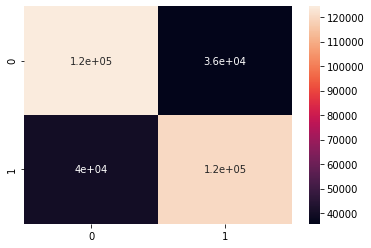

In [519]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test=NB_classifier.predict(X_test)
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm, annot=True)

In [520]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77    159996
           4       0.77      0.75      0.76    160004

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



In [521]:
#Testing Custom Input
"""
input_tweet = "I am happy today :D 😁"
input_tweet = dataclean(input_tweet)
input_tweet = preprocess(input_tweet)
input_tweet_list = list()
input_tweet_list.append(input_tweet)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

twe = vectorizer.fit_transform(input_tweet_list).toarray()

print(NB_classifier.predict_proba(twe))

"""

'\ninput_tweet = "I am happy today :D 😁"\ninput_tweet = dataclean(input_tweet)\ninput_tweet = preprocess(input_tweet)\ninput_tweet_list = list()\ninput_tweet_list.append(input_tweet)\n\nfrom sklearn.feature_extraction.text import CountVectorizer\nvectorizer = CountVectorizer()\n\ntwe = vectorizer.fit_transform(input_tweet_list).toarray()\n\nprint(NB_classifier.predict_proba(twe))\n\n'

In [522]:
#try ann or logitic reg